## Identifying and removing outliers

In [1]:
%matplotlib inline

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14,6))

In [10]:
dataset = pd.read_csv('data/rental_residence.csv', sep=";")

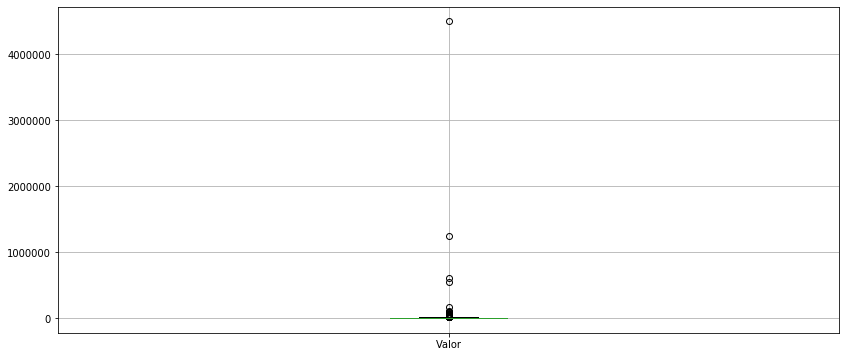

In [11]:
dataset.boxplot(['Valor'])

In [14]:
dataset[dataset['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Aggregate Type
7202,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11945,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13055,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
14630,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [17]:
values = dataset['Valor']

In [18]:
type(values)

pandas.core.series.Series

In [23]:
q1 = values.quantile(.25)
q3 = values.quantile(.75)
iiq = q3 - q1
lower_limit = q1 - 1.5 * iiq
upper_limit = q3 + 1.5 * iiq

In [25]:
select = (values >= lower_limit ) & (values <= upper_limit)
dataset_new = dataset[select]

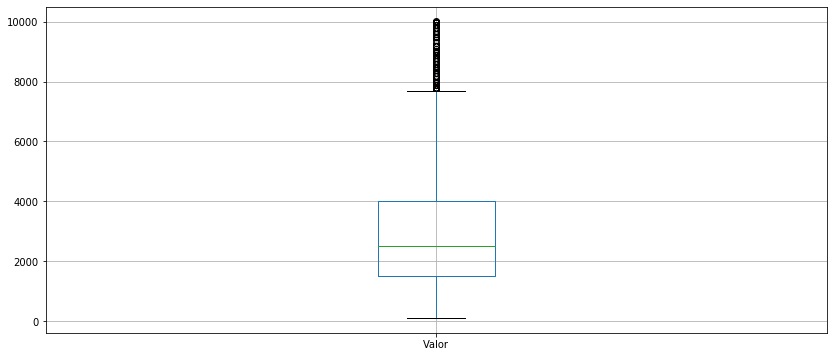

In [26]:
dataset_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f57bd0>]],
      dtype=object)

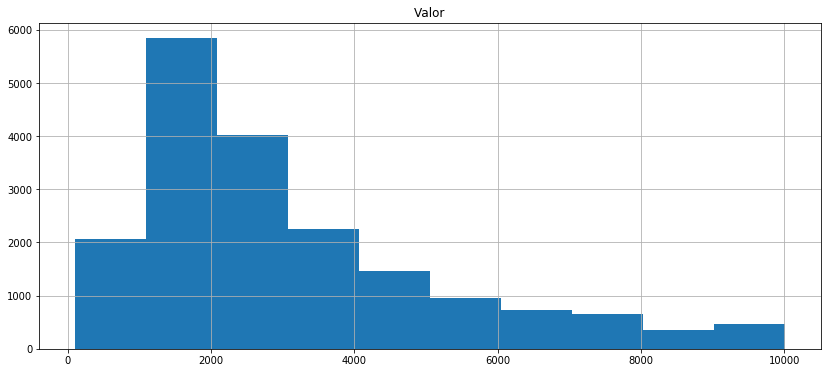

In [27]:
dataset_new.hist(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119200210>]],
      dtype=object)

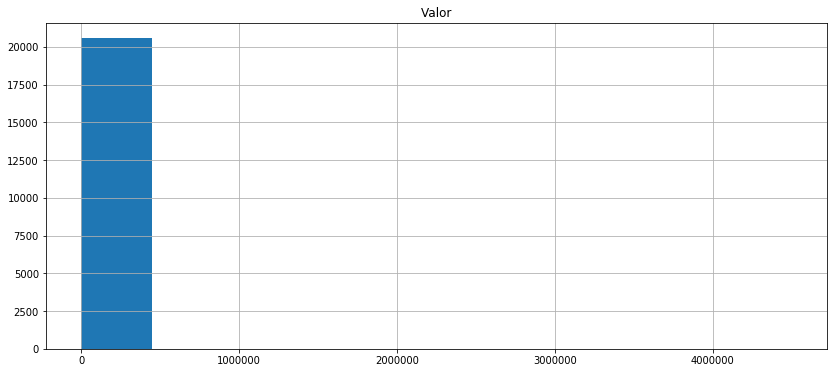

In [28]:
dataset.hist(['Valor'])